In [1]:
# Import dependencies

import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import table
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm



In [2]:
# Read the data into a Pandas DataFrame

heart_2020_df = pd.read_csv('Resources/heart_2020_cleaned.csv')
heart_2020_df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [3]:
# Rename column headers to match 2022_heart_no_nans dataset since headings in 2022 data are clearer and more complete

heart_2020_df = heart_2020_df.rename(columns={"PhysicalHealth": "PhysicalHealthDays", "MentalHealth": "MentalHealthDays", "DiffWalking": "DifficultyWalking", "GenHealth": "GeneralHealth", "SleepTime": "HoursOfSleep", "PhysicalActivity": "PhysicalActivities"}
                                 )
heart_2020_df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealthDays,MentalHealthDays,DifficultyWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivities,GeneralHealth,HoursOfSleep,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No


In [4]:
# deleted rows that involve ambiguous data in the Diabetic column to yield a binary column (fully yes or fully no)

heart_2020_cleaned = heart_2020_df[heart_2020_df["Diabetic"].str.contains("No, borderline diabetes|Yes, during pregnancy") == False]
heart_2020_cleaned

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealthDays,MentalHealthDays,DifficultyWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivities,GeneralHealth,HoursOfSleep,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No


In [5]:
#exported cleaned data in to Resources folder

heart_2020_cleaned.to_csv("Resources/2020_cleaned.csv", encoding='utf8', index=False)

In [6]:
#manually map cols that have an order that needs to be preserved

mapping_cols= heart_2020_cleaned.copy()

mapping_cols["GeneralHealth"] = mapping_cols["GeneralHealth"].map({"Excellent":4, "Very good": 3, "Good": 2, "Fair": 1, "Poor": 0})
mapping_cols["AgeCategory"] = mapping_cols["AgeCategory"].map({'18-24': 0, '25-29': 1, '30-34': 2, '35-39': 3, '40-44': 4, '45-49': 5, '50-54': 6,
'55-59': 7, '60-64': 8, '65-69': 9, '70-74': 10, '75-79': 11, '80 or older': 12})

one_hot_encoding=["GeneralHealth","AgeCategory"]

#combined columns created using dummies and the ordinally mapped columns

remaining_columns = [col for col in mapping_cols.columns if col not in one_hot_encoding]
one_hot_encoded_remaining = pd.get_dummies(mapping_cols[remaining_columns])
combined_mapping = pd.concat([mapping_cols[one_hot_encoding], one_hot_encoded_remaining], axis=1)

#remove NaN values just in case
combined_mapping.dropna(inplace=True)

pd.set_option('display.max_columns', None)

combined_mapping.head()

,GeneralHealth,AgeCategory,BMI,PhysicalHealthDays,MentalHealthDays,HoursOfSleep,HeartDisease_No,HeartDisease_Yes,Smoking_No,Smoking_Yes,AlcoholDrinking_No,AlcoholDrinking_Yes,Stroke_No,Stroke_Yes,DifficultyWalking_No,DifficultyWalking_Yes,Sex_Female,Sex_Male,Race_American Indian/Alaskan Native,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White,Diabetic_No,Diabetic_Yes,PhysicalActivities_No,PhysicalActivities_Yes,Asthma_No,Asthma_Yes,KidneyDisease_No,KidneyDisease_Yes,SkinCancer_No,SkinCancer_Yes
0,3,7,16.60,3.0,30.0,5.0,1,0,0,1,1,0,1,0,1,0,1,0,0,0,0,0,0,1,0,1,0,1,0,1,1,0,0,1
1,3,12,20.34,0.0,0.0,7.0,1,0,1,0,1,0,0,1,1,0,1,0,0,0,0,0,0,1,1,0,0,1,1,0,1,0,1,0
2,1,9,26.58,20.0,30.0,8.0,1,0,0,1,1,0,1,0,1,0,0,1,0,0,0,0,0,1,0,1,0,1,0,1,1,0,1,0
3,2,11,24.21,0.0,0.0,6.0,1,0,1,0,1,0,1,0,1,0,1,0,0,0,0,0,0,1,1,0,1,0,1,0,1,0,0,1
4,3,4,23.71,28.0,0.0,8.0,1,0,1,0,1,0,1,0,0,1,1,0,0,0,0,0,0,1,1,0,0,1,1,0,1,0,1,0


In [7]:
# Import dependencies for linear regression

from scipy.stats import linregress
from scipy import stats


features1=['GeneralHealth','HeartDisease_Yes']
features2=['AgeCategory','HeartDisease_Yes']
features3=['BMI','HeartDisease_Yes']
features4=['PhysicalHealthDays','HeartDisease_Yes']
features5=['MentalHealthDays','HeartDisease_Yes']
features6=['HoursOfSleep','HeartDisease_Yes']
features7=['Smoking_Yes','HeartDisease_Yes']
features8=['Diabetic_Yes','HeartDisease_Yes']
features9=['PhysicalActivities_Yes','HeartDisease_Yes']
features10=['Asthma_Yes','HeartDisease_Yes']
features11=['SkinCancer_Yes','HeartDisease_Yes']
features12=['AlcoholDrinking_Yes','HeartDisease_Yes']
features13=['Stroke_Yes','HeartDisease_Yes']
features14=['DifficultyWalking_Yes','HeartDisease_Yes']
features15=['KidneyDisease_Yes','HeartDisease_Yes']


print(combined_mapping[features1].corr())
print(combined_mapping[features2].corr())
print(combined_mapping[features3].corr())
print(combined_mapping[features4].corr())
print(combined_mapping[features5].corr())
print(combined_mapping[features6].corr())
print(combined_mapping[features7].corr())
print(combined_mapping[features8].corr())
print(combined_mapping[features9].corr())
print(combined_mapping[features10].corr())
print(combined_mapping[features11].corr())
print(combined_mapping[features12].corr())
print(combined_mapping[features13].corr())
print(combined_mapping[features14].corr())
print(combined_mapping[features15].corr())

                  GeneralHealth  HeartDisease_Yes
GeneralHealth          1.000000         -0.244711
HeartDisease_Yes      -0.244711          1.000000
                  AgeCategory  HeartDisease_Yes
AgeCategory          1.000000          0.234253
HeartDisease_Yes     0.234253          1.000000
                       BMI  HeartDisease_Yes
BMI               1.000000          0.052666
HeartDisease_Yes  0.052666          1.000000
                    PhysicalHealthDays  HeartDisease_Yes
PhysicalHealthDays             1.00000           0.17168
HeartDisease_Yes               0.17168           1.00000
                  MentalHealthDays  HeartDisease_Yes
MentalHealthDays          1.000000          0.028235
HeartDisease_Yes          0.028235          1.000000
                  HoursOfSleep  HeartDisease_Yes
HoursOfSleep          1.000000          0.009221
HeartDisease_Yes      0.009221          1.000000
                  Smoking_Yes  HeartDisease_Yes
Smoking_Yes          1.000000          0.10811

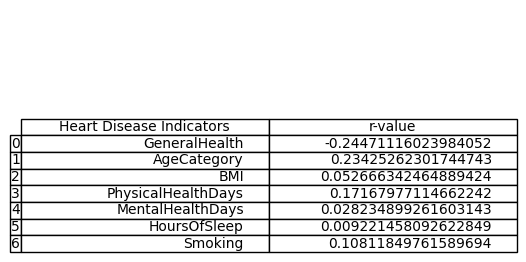

In [8]:
a=pd.DataFrame(combined_mapping[features1].corr())
b=pd.DataFrame(combined_mapping[features2].corr())
c=pd.DataFrame(combined_mapping[features3].corr())
d=pd.DataFrame(combined_mapping[features4].corr())
e=pd.DataFrame(combined_mapping[features5].corr())
f=pd.DataFrame(combined_mapping[features6].corr())
g=pd.DataFrame(combined_mapping[features7].corr())
h=pd.DataFrame(combined_mapping[features8].corr())
i=pd.DataFrame(combined_mapping[features9].corr())
j=pd.DataFrame(combined_mapping[features10].corr())
k=pd.DataFrame(combined_mapping[features11].corr())
l=pd.DataFrame(combined_mapping[features12].corr())
m=pd.DataFrame(combined_mapping[features13].corr())
n=pd.DataFrame(combined_mapping[features14].corr())
o=pd.DataFrame(combined_mapping[features15].corr())

correlation_coefficient1= pd.DataFrame([
    {"Heart Disease Indicators": "GeneralHealth", "r-value": a["HeartDisease_Yes"][0]},
    {"Heart Disease Indicators": "AgeCategory", "r-value": b["HeartDisease_Yes"][0]},
    {"Heart Disease Indicators": "BMI", "r-value": c["HeartDisease_Yes"][0]},
    {"Heart Disease Indicators": "PhysicalHealthDays", "r-value": d["HeartDisease_Yes"][0]},
    {"Heart Disease Indicators": "MentalHealthDays", "r-value": e["HeartDisease_Yes"][0]},
    {"Heart Disease Indicators": "HoursOfSleep", "r-value": f["HeartDisease_Yes"][0]},
    {"Heart Disease Indicators": "Smoking", "r-value": g["HeartDisease_Yes"][0]}
])
correlation_coefficient1

ax = plt.subplot(311, frame_on=False) # no visible frame
ax.xaxis.set_visible(False)  # hide the x axis
ax.yaxis.set_visible(False)  # hide the y axis

table(ax, correlation_coefficient1)

plt.savefig('Images/mytable1.png')


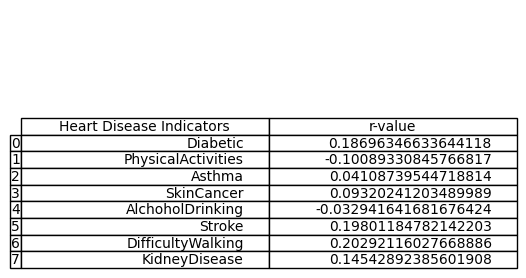

In [9]:
correlation_coefficient2= pd.DataFrame([
    {"Heart Disease Indicators": "Diabetic", "r-value": h["HeartDisease_Yes"][0]},
    {"Heart Disease Indicators": "PhysicalActivities", "r-value": i["HeartDisease_Yes"][0]},
    {"Heart Disease Indicators": "Asthma", "r-value": j["HeartDisease_Yes"][0]},
    {"Heart Disease Indicators": "SkinCancer", "r-value": k["HeartDisease_Yes"][0]},
    {"Heart Disease Indicators": "AlchoholDrinking", "r-value": l["HeartDisease_Yes"][0]},
    {"Heart Disease Indicators": "Stroke", "r-value": m["HeartDisease_Yes"][0]},
    {"Heart Disease Indicators": "DifficultyWalking", "r-value": n["HeartDisease_Yes"][0]},
    {"Heart Disease Indicators": "KidneyDisease", "r-value": o["HeartDisease_Yes"][0]}
])
correlation_coefficient2

ax = plt.subplot(311, frame_on=False) # no visible frame
ax.xaxis.set_visible(False)  # hide the x axis
ax.yaxis.set_visible(False)  # hide the y axis

table(ax, correlation_coefficient2)

plt.savefig('Images/mytable2.png')

In [10]:
#all_correlations=pd.concat([correlation_coefficient1, correlation_coefficient2], axis=1)
#all_correlations

In [11]:
all_correlations= pd.DataFrame([
    {"Heart Disease Indicators": "GeneralHealth", "r-value": a["HeartDisease_Yes"][0]},
    {"Heart Disease Indicators": "AgeCategory", "r-value": b["HeartDisease_Yes"][0]},
    {"Heart Disease Indicators": "BMI", "r-value": c["HeartDisease_Yes"][0]},
    {"Heart Disease Indicators": "PhysicalHealthDays", "r-value": d["HeartDisease_Yes"][0]},
    {"Heart Disease Indicators": "MentalHealthDays", "r-value": e["HeartDisease_Yes"][0]},
    {"Heart Disease Indicators": "HoursOfSleep", "r-value": f["HeartDisease_Yes"][0]},
    {"Heart Disease Indicators": "Smoking", "r-value": g["HeartDisease_Yes"][0]},
    {"Heart Disease Indicators": "Diabetic", "r-value": h["HeartDisease_Yes"][0]},
    {"Heart Disease Indicators": "PhysicalActivities", "r-value": i["HeartDisease_Yes"][0]},
    {"Heart Disease Indicators": "Asthma", "r-value": j["HeartDisease_Yes"][0]},
    {"Heart Disease Indicators": "SkinCancer", "r-value": k["HeartDisease_Yes"][0]},
    {"Heart Disease Indicators": "AlchoholDrinking", "r-value": l["HeartDisease_Yes"][0]},
    {"Heart Disease Indicators": "Stroke", "r-value": m["HeartDisease_Yes"][0]},
    {"Heart Disease Indicators": "DifficultyWalking", "r-value": n["HeartDisease_Yes"][0]},
    {"Heart Disease Indicators": "KidneyDisease", "r-value": o["HeartDisease_Yes"][0]}
])
top5_correlations = all_correlations.sort_values('r-value',key=abs,ascending=False).groupby('Heart Disease Indicators')
display(top5_correlations.head())


,Heart Disease Indicators,r-value
0,GeneralHealth,-0.244711
1,AgeCategory,0.234253
13,DifficultyWalking,0.202921
12,Stroke,0.198012
7,Diabetic,0.186963
3,PhysicalHealthDays,0.171680
14,KidneyDisease,0.145429
6,Smoking,0.108118
8,PhysicalActivities,-0.100893
10,SkinCancer,0.093202
